# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import statsmodels.api as sm

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [17]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range(start='2017-01-01', end='2018-03-31')

In [18]:
# store the parameters
phi = 0.7
noises = np.random.normal(0, 2, len(dates))
mu = 5
y0 = 8

In [23]:
# generate the time series according to the formula
ts = np.zeros(len(dates), dtype=float)
ts[0] = y0
y = y0
for t in range(1, len(dates)):
    ts[t] = mu+phi*y+noises[t]
    y = ts[t] - mu
ts = pd.Series(ts, index=dates)

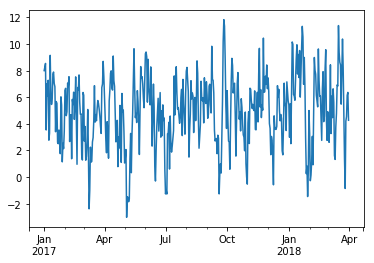

In [24]:
ts.plot()

Plot the time series and verify what you see

In [25]:
# plot here

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

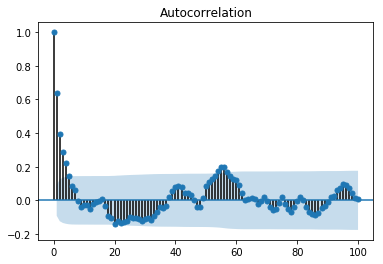

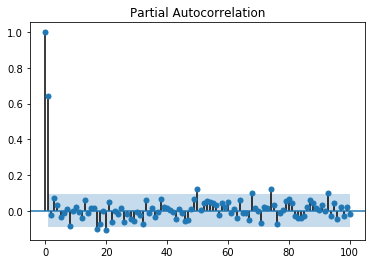

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# plot autocorrelation
plot_acf(ts, lags = 100);
# plot partial autocorrelation
plot_pacf(ts, lags = 100);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [27]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -964.537
Method:                       css-mle   S.D. of innovations              2.014
Date:                Wed, 12 Jun 2019   AIC                           1935.074
Time:                        20:58:58   BIC                           1947.435
Sample:                    01-01-2017   HQIC                          1939.943
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9351      0.263     18.777      0.000       4.420       5.450
ar.L1.y        0.6421      0.036     17.892      0.000       0.572       0.712
                                    Roots           

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [29]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range(start='2015-04-01', end='2015-08-31')

# store the parameters
theta = 0.9
mu = 7
noises = np.random.normal(0, 4, len(dates))

ts = np.zeros(len(dates))
#generate the time series
for t in range(1, len(dates)):
    ts[t] = mu + noises[t] + theta*noises[t-1]
    
ts = pd.Series(ts, index=dates)

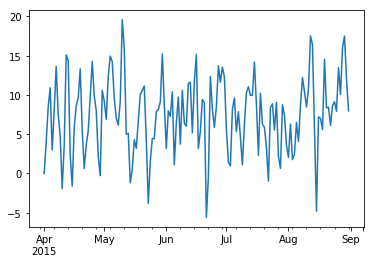

In [31]:
ts.plot()

## Look at the ACF and PACF of your model and write down your conclusions

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


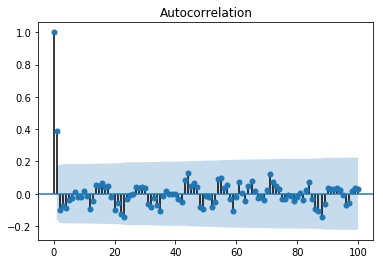

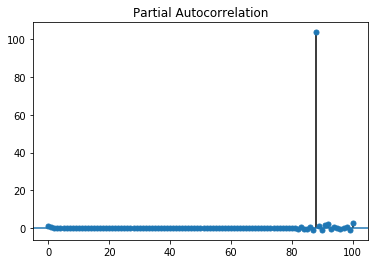

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
# plot autocorrelation
plot_acf(ts, lags = 100);
# plot partial autocorrelation
plot_pacf(ts, lags = 100);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [34]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.518
Method:                       css-mle   S.D. of innovations              3.911
Date:                Wed, 12 Jun 2019   AIC                            859.036
Time:                        21:03:27   BIC                            868.128
Sample:                    04-01-2015   HQIC                           862.729
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4080      0.595     12.447      0.000       6.241       8.575
ma.L1.y        0.8884      0.044     20.105      0.000       0.802       0.975
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [35]:
# the data is in "winning_400m.csv"
df = pd.read_csv("winning_400m.csv")

In [37]:
df.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [38]:
df.set_index('year', inplace=True)

In [39]:
df.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot the data

In [36]:
ts = df["winning_times"
       ]

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [ ]:
# your code here

In [ ]:
# Look at ACF and PACF

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [ ]:
# your code here

In [ ]:
# Try another one

## What is your final model? Why did you pick this model?

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.